In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import io

# Load the data

In [2]:
business_json_file = 'business.json'
user_json_file = 'user.json'
review_json_file = 'review.json'
business = []
user=[]
review = []
for line in open(business_json_file, 'r'):
    business.append(json.loads(line))

In [3]:
for line in open(user_json_file, 'r'):
    user.append(json.loads(line))

In [4]:
for line in open(review_json_file, 'r'):
    review.append(json.loads(line))

In [5]:
business_df = pd.DataFrame.from_records(business)
user_df = pd.DataFrame.from_records(user)
review_df = pd.DataFrame.from_records(review)

# Explore the category

In [6]:
cleaned_business = business_df

In [7]:
category_business  = cleaned_business.drop(['address','city','hours','is_open','latitude','longitude','name','postal_code','review_count','state'],axis = 1)

In [8]:
def split(x):
    if x is None:
        return []
    else:
        return x.split(',')
    
category_business['split_categories'] = category_business['categories'].apply(split)
category = category_business['split_categories'].apply(pd.Series).reset_index().melt(id_vars = 'index').dropna()[['index','value']].set_index('index')

In [9]:
seperated_category = pd.merge(category_business,category,right_index = True,left_index= True)

In [10]:
clean_sc = seperated_category.drop(['attributes','categories','stars','split_categories'],axis = 1)

In [11]:
clean_sc.head(3)

,business_id,value
0,1SWheh84yJXfytovILXOAQ,Golf
0,1SWheh84yJXfytovILXOAQ,Active Life
1,QXAEGFB4oINsVuTFxEYKFQ,Specialty Food


In [12]:
def clean_value(x):
        if x == 'Food':
            return 'Restaurants'
        return x.strip()

clean_sc['value'] = clean_sc['value'].apply(lambda x :clean_value(x))

In [13]:
clean_sc.head(3)

,business_id,value
0,1SWheh84yJXfytovILXOAQ,Golf
0,1SWheh84yJXfytovILXOAQ,Active Life
1,QXAEGFB4oINsVuTFxEYKFQ,Specialty Food


In [14]:
sc = clean_sc.groupby('value').count().sort_values('business_id',ascending = False).head(10)

In [185]:
sc.

SyntaxError: invalid syntax (<ipython-input-185-09121b2d8533>, line 1)

,business_id
value,
Restaurants,67394
Shopping,31878
Food,21966
Home Services,19729
Beauty & Spas,19370
Health & Medical,17171
Local Services,13932
Automotive,13203
Nightlife,13095


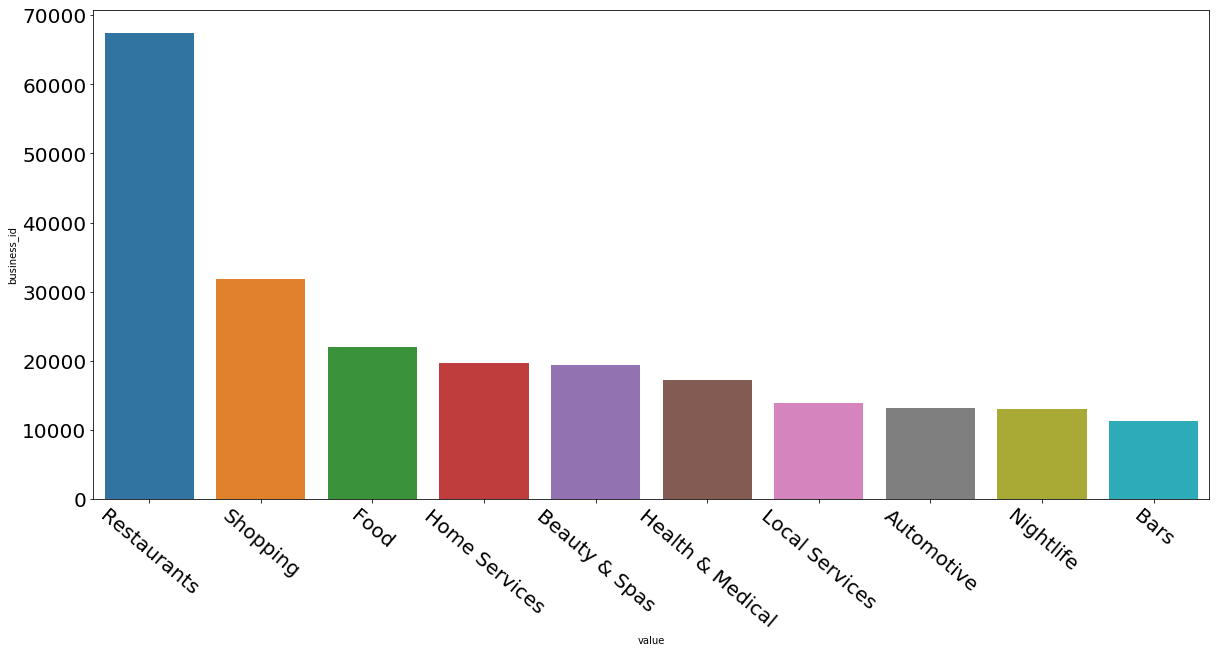

In [16]:
import seaborn as sns
a4_dims = (20, 9)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x=sc.index,y=sc.business_id,ax = ax)
plt.tick_params(labelsize = 20)
plt.xticks(rotation=320)
sc.head(20)

# Explore the attributes

In [107]:
attributes_business = cleaned_business.drop(['address','city','hours','is_open','latitude','longitude','name','postal_code','review_count','state'],axis = 1)

In [108]:
attributes_business.head(3)

,attributes,business_id,categories,stars
0,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",3.0
1,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",2.5
2,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",4.0


In [109]:
def clean_attributes(x):
    attributes = []
    if x is None:
        return attributes
    else:
        for attribute, y in x.items():
            if y == 'True' or 'free':
                attributes.append(attribute)
        return attributes
attributes_business['split_attributes'] = attributes_business['attributes'].apply(clean_attributes)

In [110]:
attributes = attributes_business['split_attributes'].apply(pd.Series).reset_index().melt(id_vars = 'index').dropna()[['index','value']].set_index('index')

In [111]:
seperated_attribute = pd.merge(attributes_business,attributes,right_index = True,left_index= True)

In [113]:
clean_sa = seperated_attribute.drop(['attributes','categories','stars','split_attributes'],axis = 1)

In [203]:
sa = seperated_attribute.groupby('value').count().sort_values('business_id',ascending = False).head(10)

,business_id
value,
Restaurants,89360
Shopping,31878
Home Services,19729
Beauty & Spas,19370
Health & Medical,17171


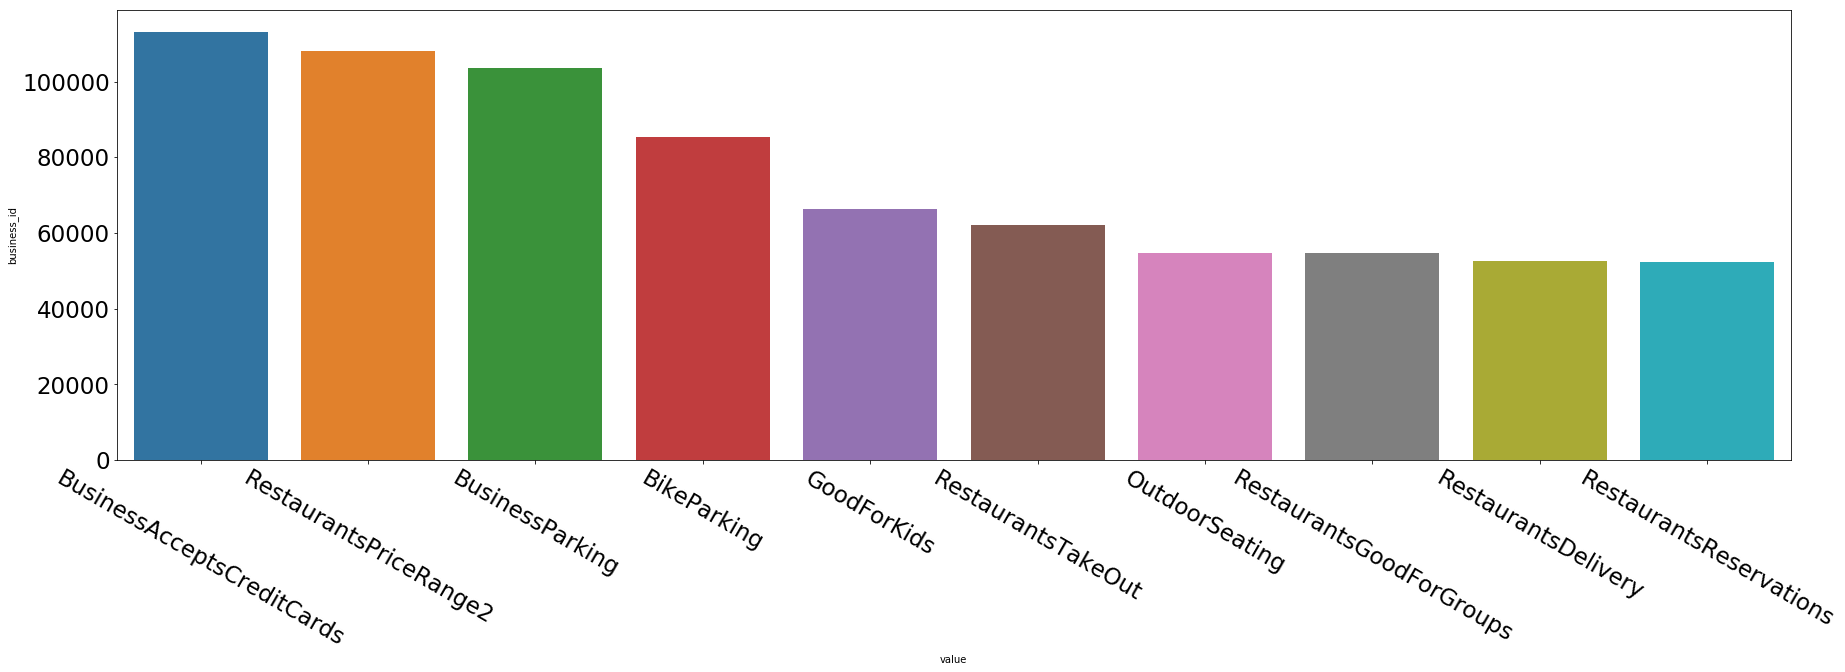

In [205]:
a4_dims = (30, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x=sa.index,y=sa.business_id,ax = ax)
plt.tick_params(labelsize = 23)
plt.xticks(rotation=330)
sc.head(5)

# User and topic connection

In [116]:
cleaned_review = review_df[['business_id','user_id']]

In [120]:
cleaned_review.groupby('user_id')['business_id'].apply(list)

user_id
---1lKK3aKOuomHnwAkAow    [qmymSqVwHYRqdwfcBatzpQ, HZdtHOEaKUL2SlWj5owgC...
---89pEy_h9PvHwcHNbpyg                             [aq5dfc469jZ0-xhIYLgCNw]
---94vtJ_5o_nikEs6hUjg    [GgfGB1yadYSHaNYrzaO1_A, hWfaS9LsPCM56zP0T8E-c...
---PLwSf5gKdIoVnyRHgBA     [Y5CTA3S9TVkpr3Yvwaki-A, kuQtE_ERgRxIbSnSIxEWCg]
---cu1hq55BP9DWVXXKHZg    [eCJDiRPoSuA0bsb7F1gNUA, EGzsR_Tyd0QOaZ6g7wPl-...
---fhiwiwBYrvqhpXgcWDQ                             [O6-BlCviQBIEcGW4ll6ZsQ]
---udAKDsn0yQXmzbWQNSw     [qsJkjQoM3Hdg6Gtqp2S9_w, owxcYAUca_6K6BAUX4V48w]
--0LlX_UcypHnxW-4BUAdA                             [yynqjo-lHyMVIrhLZ5jGXg]
--0RtXvcOIE4XbErYca6Rw                             [JJxI7OA8wgr8ZMuwaKborQ]
--0VhLFv2XfEKHL0YSCSuw                             [v_euwOoIJKLIGIXnQuEeIg]
--0WZ5gklOfbUIodJuKfaQ                             [R0iz7n80-mDo2_uL_Q5ANg]
--0kuuLmuYBe3Rmu0Iycww    [j44rZzlLtTkGltqcPoX4Og, PYe_FDw6QTbTf66WcGE_t...
--0sXNBv6IizZXuV-nl0Aw                             [1WBVqmo7tgF0z0eGf4fPhQ]
--0z

In [123]:
merge_user = pd.merge(cleaned_review,clean_sc, on='business_id')

In [131]:
merge_user.groupby('user_id').count(['value'])

TypeError: count() takes 1 positional argument but 2 were given

In [73]:
cat_connection = pd.merge(cleaned_review,seperated_category,right_index = True,left_index= True)

In [84]:
certain = cleaned_review[cleaned_review['user_id'] == 'n6-Gk65cPZL6Uz8qRm3NYw']

In [87]:
seperated_category[seperated_category['buisness_id'] in certain['business_id']]

KeyError: 'buisness_id'

In [ ]:
pd.merge()